In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             193 non-null    int64  
 1   Country Name                            193 non-null    object 
 2   E-Government Rank                       193 non-null    int64  
 3   E-Government Index                      193 non-null    float64
 4   E-Participation Index                   193 non-null    float64
 5   Online Service Index                    193 non-null    float64
 6   Human Capital Index                     193 non-null    float64
 7   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ KB


In [4]:
pib = pd.read_csv('pib_percapita_ppc.csv')

In [5]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [6]:
pib = pib.iloc[:, [0, 68]]

In [7]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2024          232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [8]:
egdi['Country Name'].value_counts().sum()

np.int64(193)

In [9]:
pib['Country Name'].value_counts().sum()

np.int64(266)

In [10]:
print(pib['Country Name'].value_counts().sum())
print(egdi['Country Name'].value_counts().sum())

266
193


In [11]:
set(egdi['Country Name']).difference(pib['Country Name'])

{'Bahamas',
 'Congo',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Egypt',
 'Gambia',
 'Georgia (Country)',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Yemen'}

In [12]:
pib['Country Name'] = pib['Country Name'].replace({
    'Bahamas, The': 'Bahamas',
    'South Korea': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Slovak Republic': 'Slovakia',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    'Congo, Rep.': 'Congo',
    "Congo, Dem. Rep.": 'Democratic Republic of the Congo',
    'Korea, Rep.': 'Republic of Korea',
    'Yemen, Rep.': 'Yemen',
    'Venezuela, RB': 'Venezuela',
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Lao PDR': "Lao People's Democratic Republic",
    'Georgia': 'Georgia (Country)',
    'Gambia, The': 'Gambia',
    "Kyrgyz Republic": 'Kyrgyzstan',
    "Micronesia, Fed. Sts.": 'Micronesia (Federated States of)',
    "Egypt, Arab Rep.": "Egypt",
    "Iran, Islamic Rep.": 'Iran (Islamic Republic of)',
    'Turkiye': 'Türkiye'
})

In [13]:
set(egdi['Country Name']).difference(pib['Country Name'])

set()

In [14]:
pib = pib[pib['Country Name'].isin(egdi['Country Name'])]

In [15]:
pib['Country Name'].value_counts().sum()

np.int64(193)

In [16]:
pib = pib.rename(columns={
    '2024': 'gastos_publicos'
})

In [17]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 2 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     193 non-null    object 
 1   gastos_publicos  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [18]:
pib['gastos_publicos'].isna().sum()

np.int64(17)

In [19]:
egdi = egdi.drop(columns={
    'E-Government Rank',
    'Survey Year'
})

In [20]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            193 non-null    object 
 1   E-Government Index                      193 non-null    float64
 2   E-Participation Index                   193 non-null    float64
 3   Online Service Index                    193 non-null    float64
 4   Human Capital Index                     193 non-null    float64
 5   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.2+ KB


In [21]:
df = pd.merge(egdi,  pib, on='Country Name')

In [22]:
df.head()

,Country Name,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index,gastos_publicos
0,Iraq,0.45721,0.0959,0.18755,0.49672,0.68736,12725.043126
1,Ireland,0.91377,0.9178,0.87678,0.90460,0.95987,115337.166701
2,Israel,0.90143,0.6986,0.85412,0.87390,0.97633,47338.842462
3,Italy,0.83557,0.6575,0.76239,0.84262,0.90167,53115.135100
4,Jamaica,0.66777,0.4384,0.56772,0.70600,0.72963,10259.995110


In [23]:
df = df.drop(columns={
    'Country Name'
})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   E-Government Index                      193 non-null    float64
 1   E-Participation Index                   193 non-null    float64
 2   Online Service Index                    193 non-null    float64
 3   Human Capital Index                     193 non-null    float64
 4   Telecommunication Infrastructure Index  193 non-null    float64
 5   gastos_publicos                         176 non-null    float64
dtypes: float64(6)
memory usage: 9.2 KB


In [25]:
corr_df = pd.DataFrame({
    'EGDI x PIB per capita PPC': df['gastos_publicos'].corr(df['E-Government Index'], method='spearman'),
    'EPI x PIB per capita PPC': df['gastos_publicos'].corr(df['E-Participation Index'], method='spearman'),
    'HCI x PIB per capita PPC': df['gastos_publicos'].corr(df['Online Service Index'], method='spearman'),
    'OSI x PIB per capita PPC': df['gastos_publicos'].corr(df['Human Capital Index'], method='spearman'),
    'TII x PIB per capita PPC': df['gastos_publicos'].corr(df['Telecommunication Infrastructure Index'], method='spearman')
}, [1])

In [26]:
corr_df.head()

,EGDI x PIB per capita PPC,EPI x PIB per capita PPC,HCI x PIB per capita PPC,OSI x PIB per capita PPC,TII x PIB per capita PPC
1,0.87565,0.666536,0.706196,0.862069,0.88926


In [27]:
corr_df = corr_df.melt(
    value_vars=[
        'EGDI x PIB per capita PPC',
        'EPI x PIB per capita PPC',
        'HCI x PIB per capita PPC',
        'OSI x PIB per capita PPC',
        'TII x PIB per capita PPC'
    ],
    var_name='Comparacao', 
    value_name='Coeficiente_Correlacao'
)

In [28]:
corr_df.head()

,Comparacao,Coeficiente_Correlacao
0,EGDI x PIB per capita PPC,0.875650
1,EPI x PIB per capita PPC,0.666536
2,HCI x PIB per capita PPC,0.706196
3,OSI x PIB per capita PPC,0.862069
4,TII x PIB per capita PPC,0.889260


In [29]:
corr_df = corr_df.sort_values(by='Coeficiente_Correlacao', ascending=False)

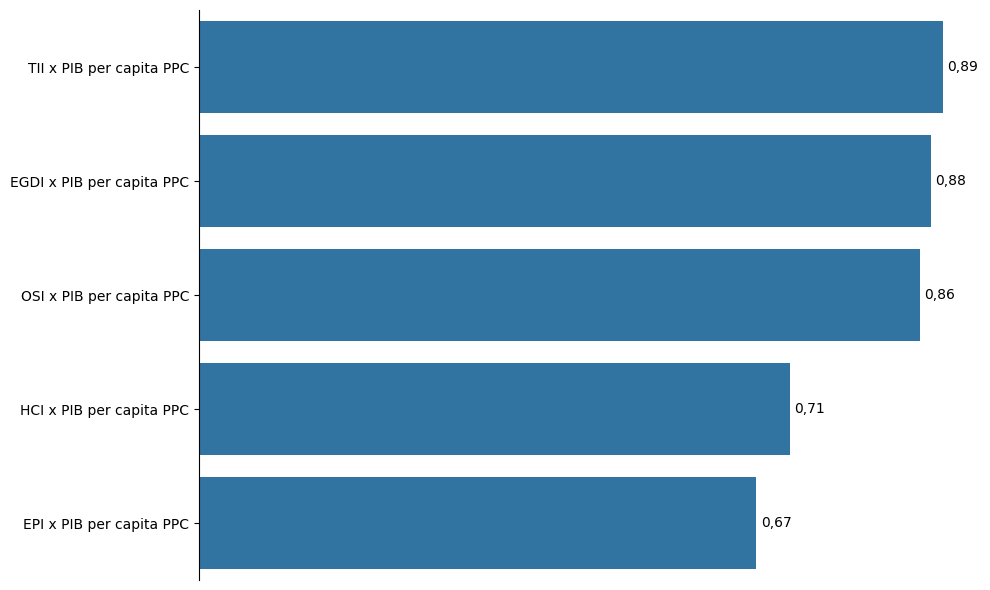

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_container = sns.barplot(corr_df, x='Coeficiente_Correlacao', y='Comparacao')

ax.bar_label(bar_container.containers[0], fmt=lambda x: f'{x:.2f}'.replace('.', ','), padding=3, label_type='edge')
sns.despine(bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_visible(False)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Dissertacao-Mestrado-PoderJud-EGDI/figuras/correlacao_egdi_pibpercapitapcc.png', dpi=300, bbox_inches='tight')
plt.show()